In [37]:
#Conexão com o Google Drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
print('TRABALHO AVALIATIVO 2 - ENTREGA 21/04')
print('Aluno: Fábio Rodrigues Garbato')
print('RGM: 13345036')
print('Professora: Osmary Camila Bortoncello Glober (Mary)')
print('')
print('OBJETIVO: Fazer o efeito ChromaKey com as imagens disponibilizadas com fundo verde, no background Disponibilizado')

TRABALHO AVALIATIVO 2 - ENTREGA 21/04
Aluno: Fábio Rodrigues Garbato
RGM: 13345036
Professora: Osmary Camila Bortoncello Glober (Mary)

OBJETIVO: Fazer o efeito ChromaKey com as imagens disponibilizadas com fundo verde, no background Disponibilizado


In [39]:
#Importando Bibliotecas
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Mude os nomes aqui da imagem a ser carregada
nome_base = 'formas'

# Definindo o caminho da imagem original
caminho_img_original = f'/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/ImagensVerde/{nome_base}.bmp'
caminho_background = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/ImagensVerde/background.bmp'

# Validando se o arquivo existe e carregando as imagens
try:
    img_original = cv2.imread(caminho_img_original)
    background = cv2.imread(caminho_background)
    if img_original is None or background is None:
        raise Exception('Erro: Não foi possível carregar a imagem.')
except Exception as e:
    print(e)
else:
    print('Imagens carregadas com sucesso!')


Imagens carregadas com sucesso!


In [41]:
print('ANTES DO REDIMENSIONAMENTO')
print(img_original.shape)
print(background.shape)

print('')
print('REDIMENSIONANDO IMAGEM...')

# Obtendo as dimensões da imagem original
img_height, img_width, _ = img_original.shape

# Redimensionando o plano de fundo para o mesmo tamanho da imagem original sem interpolação
background_resized = cv2.resize(background, (img_width, img_height))

print('')
print('DEPOIS DO REDIMENSIONAMENTO')
print(background_resized.shape)
print(img_original.shape)

ANTES DO REDIMENSIONAMENTO
(720, 812, 3)
(564, 753, 3)

REDIMENSIONANDO IMAGEM...

DEPOIS DO REDIMENSIONAMENTO
(720, 812, 3)
(720, 812, 3)


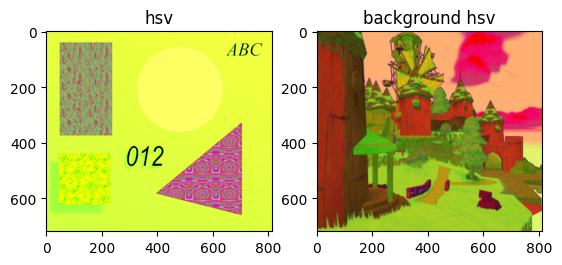

In [42]:
# Conversão para o espaço de cores HSV
hsv = cv2.cvtColor(img_original, cv2.COLOR_BGR2HSV)
bg_hsv = cv2.cvtColor(background_resized, cv2.COLOR_BGR2HSV)

plt.subplot(121)
plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_BGR2RGB))
plt.title('hsv')
plt.subplot(122)
plt.imshow(cv2.cvtColor(bg_hsv, cv2.COLOR_BGR2RGB))
plt.title('background hsv')
plt.show()

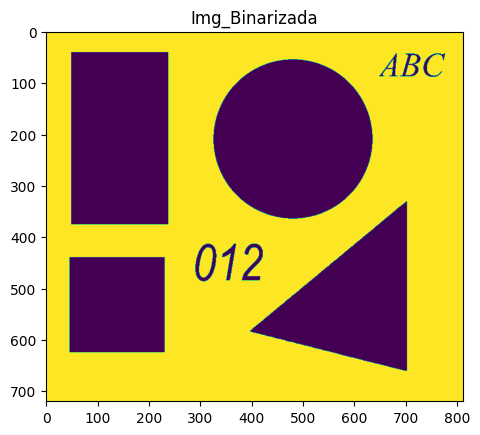

IMAGEM SALVA COM SUCESSO!


In [43]:
#Aqui é a uma das partes mais importantes, definindo os valores HSV para isolar todos os tons de verde da imagem
lower_green = np.array([45, 100, 100])
upper_green = np.array([70, 255, 255])

# Binarizando a imagem
_, mask = cv2.threshold(cv2.inRange(hsv, lower_green, upper_green), 0, 255, cv2.THRESH_BINARY)

plt.title('Img_Binarizada')
plt.imshow(mask)
plt.show()

# Define o caminho da pasta de saída com base no nome da imagem base
if 'rainha' in nome_base.lower():
    caminho_pasta_saida = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/Img_Filtros/rainha/'
elif 'corvo' in nome_base.lower() and 'corvos' not in nome_base.lower():
    caminho_pasta_saida = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/Img_Filtros/corvo/'
elif 'corvos' in nome_base.lower():
    caminho_pasta_saida = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/Img_Filtros/corvos/'
else:
    caminho_pasta_saida = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/Img_Filtros/formas/'

# Define o nome do arquivo de imagem binarizada
nome_arquivo_binarizado = 'Img_Binarizada.bmp'

# Verifica se já existe uma imagem binarizada na pasta de saída
if os.path.isfile(os.path.join(caminho_pasta_saida, nome_arquivo_binarizado)):
    print('ERRO AO SALVAR!')
    print('')
    print(f"Já existe uma imagem binarizada para a pasta {nome_base}.")
else:
    print('IMAGEM SALVA COM SUCESSO!')
    cv2.imwrite(os.path.join(caminho_pasta_saida, nome_arquivo_binarizado), mask)

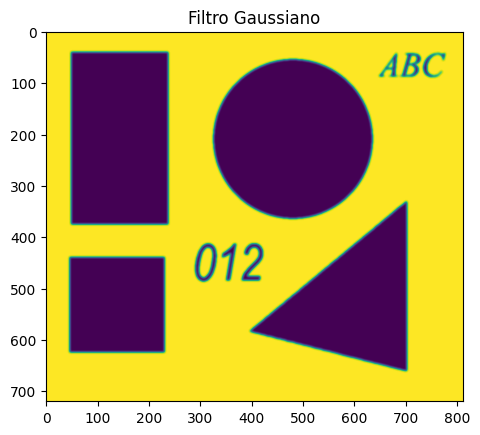

IMAGEM SALVA COM SUCESSO!


In [44]:
# aplicação do filtro gaussiano
kernel_gaussian = (11,11) #Variavel para testar com valores diferentes

blur = cv2.GaussianBlur(mask, kernel_gaussian, 0)

plt.title('Filtro Gaussiano')
plt.imshow(blur)
plt.show()

# Define o caminho da pasta de saída com base no nome da imagem base
if 'rainha' in nome_base.lower():
    caminho_pasta_saida = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/Img_Filtros/rainha/'
elif 'corvo' in nome_base.lower() and 'corvos' not in nome_base.lower():
    caminho_pasta_saida = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/Img_Filtros/corvo/'
elif 'corvos' in nome_base.lower():
    caminho_pasta_saida = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/Img_Filtros/corvos/'
else:
    caminho_pasta_saida = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/Img_Filtros/formas/'

# Define o nome do arquivo de imagem binarizada
nome_arquivo_gaussiano = 'Img_Gaussian.bmp'

# Verifica se já existe uma imagem binarizada na pasta de saída
if os.path.isfile(os.path.join(caminho_pasta_saida, nome_arquivo_gaussiano)):
    print('ERRO AO SALVAR!')
    print('')
    print(f"Já existe uma imagem com o filtro gaussiano para a pasta {nome_base}.")
else:
    print('IMAGEM SALVA COM SUCESSO!')
    cv2.imwrite(os.path.join(caminho_pasta_saida, nome_arquivo_gaussiano), blur)

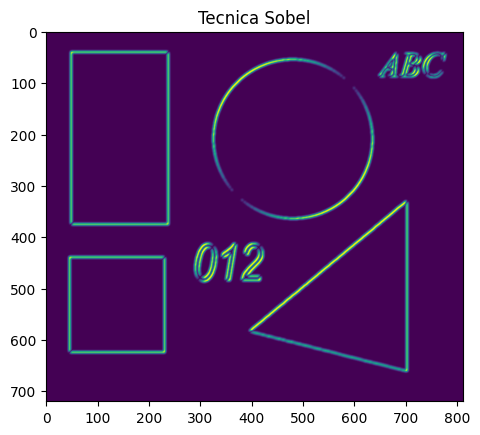

IMAGEM SALVA COM SUCESSO!


In [45]:
# Suavização das bordas da máscara com a tecnica sobel
kernel = np.ones((11,11),np.uint8) #Aqui o Kernel foi definido como uma variavel, e o valor pode ser editado para testar com outros valores; 
sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, kernel)
sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, kernel)
mascara_sobel = cv2.convertScaleAbs(cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0))

plt.title('Tecnica Sobel')
plt.imshow(mascara_sobel)
plt.show()

# Define o caminho da pasta de saída com base no nome da imagem base
if 'rainha' in nome_base.lower():
    caminho_pasta_saida = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/Img_Filtros/rainha/'
elif 'corvo' in nome_base.lower() and 'corvos' not in nome_base.lower():
    caminho_pasta_saida = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/Img_Filtros/corvo/'
elif 'corvos' in nome_base.lower():
    caminho_pasta_saida = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/Img_Filtros/corvos/'
else:
    caminho_pasta_saida = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/Img_Filtros/formas/'

# Define o nome do arquivo de imagem binarizada
nome_arquivo_sobel = 'Img_Sobel.bmp'

# Verifica se já existe uma imagem binarizada na pasta de saída
if os.path.isfile(os.path.join(caminho_pasta_saida, nome_arquivo_sobel)):
    print('ERRO AO SALVAR!')
    print('')
    print(f"Já existe uma imagem com o filtro sobel para a pasta {nome_base}.")
else:
    print('IMAGEM SALVA COM SUCESSO!')
    cv2.imwrite(os.path.join(caminho_pasta_saida, nome_arquivo_sobel), mascara_sobel)

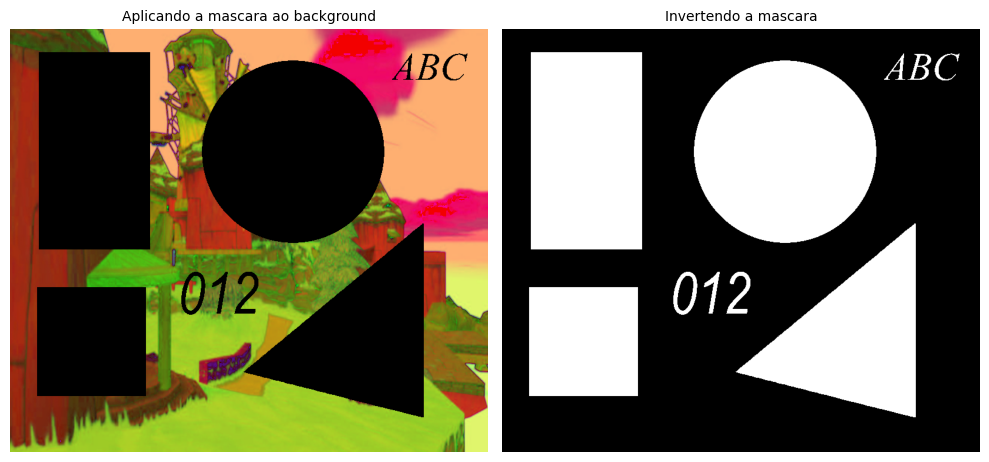

In [46]:
# Aplicação da máscara no background
masked_bg = cv2.bitwise_and(bg_hsv, bg_hsv, mask=mask)

# Inversão da máscara para obter as regiões não verdes
mask_inv = cv2.bitwise_not(mask)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(masked_bg, cv2.COLOR_BGR2RGB))
plt.title('Aplicando a mascara ao background', fontsize=10) 
plt.axis('off') 

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(mask_inv, cv2.COLOR_BGR2RGB))
plt.title('Invertendo a mascara', fontsize=10) 
plt.axis('off') 

plt.tight_layout() 
plt.show()

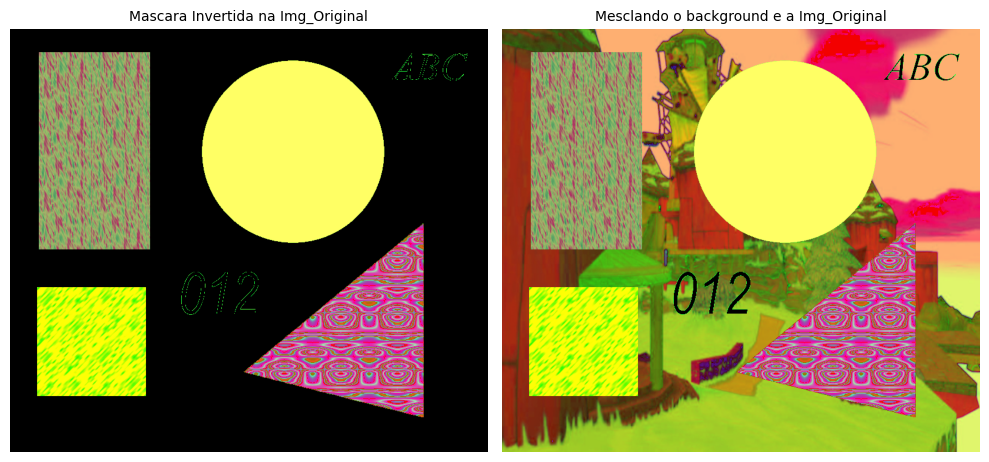

In [47]:
# Aplicação da máscara invertida na imagem de entrada
masked_img = cv2.bitwise_and(hsv, hsv, mask=mask_inv)

# Mesclagem do background e da imagem de entrada
result_hsv = cv2.add(masked_bg, masked_img)

plt.figure(figsize=(10, 5)) 

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
plt.title('Mascara Invertida na Img_Original', fontsize=10)
plt.axis('off') 

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_hsv, cv2.COLOR_BGR2RGB))
plt.title('Mesclando o background e a Img_Original', fontsize=10)
plt.axis('off') 

plt.tight_layout()
plt.show()

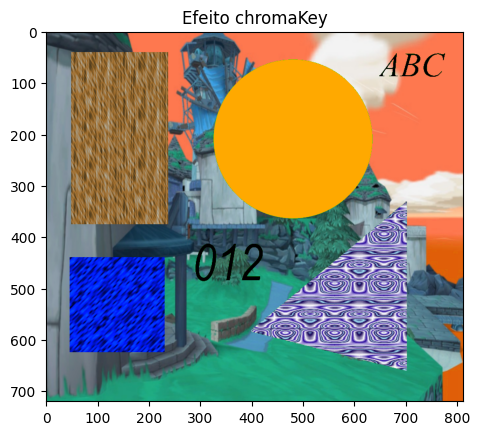

IMAGEM SALVA COM SUCESSO!


In [48]:
# Efeito chromaKey Convertendo as cores para o BGR novamente
result_bgr = cv2.cvtColor(result_hsv, cv2.COLOR_HSV2BGR)

plt.title('Efeito chromaKey')
plt.imshow(result_bgr)
plt.show()

# Define o caminho da pasta de saída com base no nome da imagem base
if 'rainha' in nome_base.lower():
    caminho_pasta_saida = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/Img_Filtros/rainha/'
elif 'corvo' in nome_base.lower() and 'corvos' not in nome_base.lower():
    caminho_pasta_saida = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/Img_Filtros/corvo/'
elif 'corvos' in nome_base.lower():
    caminho_pasta_saida = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/Img_Filtros/corvos/'
else:
    caminho_pasta_saida = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/Trabalho2104/Img_Filtros/formas/'

# Define o nome do arquivo de imagem binarizada
nome_arquivo_ChromaKey = 'Img_ChromaKey.bmp'

# Verifica se já existe uma imagem binarizada na pasta de saída
if os.path.isfile(os.path.join(caminho_pasta_saida, nome_arquivo_ChromaKey)):
    print('ERRO AO SALVAR!')
    print('')
    print(f"Já existe uma imagem com o filtro ChromaKey para a pasta {nome_base}.")
else:
    print('IMAGEM SALVA COM SUCESSO!')
    cv2.imwrite(os.path.join(caminho_pasta_saida, nome_arquivo_ChromaKey), result_bgr)
